In [15]:
import urllib.request
import pandas as pd
import numpy as np
from scipy import stats

#plot stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

In [16]:
df = pd.read_csv("df_sum_score.csv")

In [17]:
df_temp = df.HI_GRADE_AVG.sort_values(ascending=False, inplace=False, kind='quicksort')
df_top_100 = df_temp.head(100)
# df_top_100[""]


# df_top_100.index
# df_top_100.index

In [18]:
type(df_top_100)

pandas.core.series.Series

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


def Ridgeline_dists(df,x, metric="",plot_label=""):

    df_temp = df.copy()
    # df_temp = df_temp.loc[df_temp["GENDER"] == GENDER]
#     df_temp.email = df_temp.email.str.split("@").str[0]

    x = x #df_temp.TOTAL_SCORE_S11
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))

    # The order of the emails in relation to their email
    # df_kat_order = df_kat.groupby(["g"]).mean()
    df_kat_order = df_kat.groupby(["g"]).count()

    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # email = df_kat_order.index
    # email = email.to_frame(index=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        # hue_order=email.g,
        aspect=15,
        height=0.5,
        palette=pal,
        # row_order=email.g,
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes,
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)


C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
C:\Users\bayka\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate 

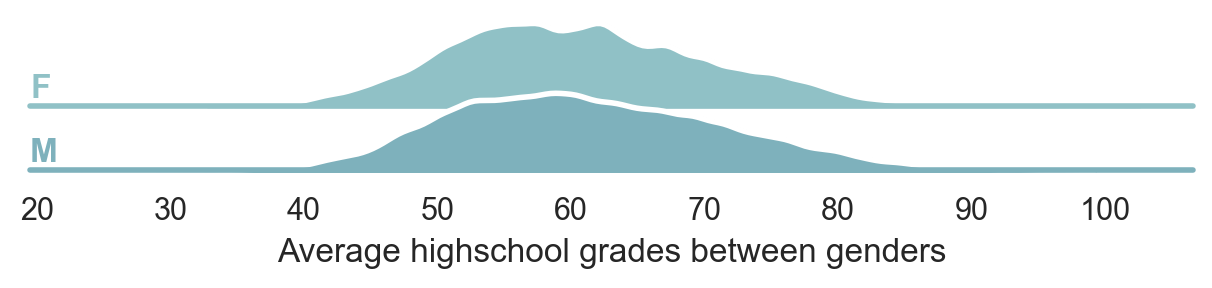

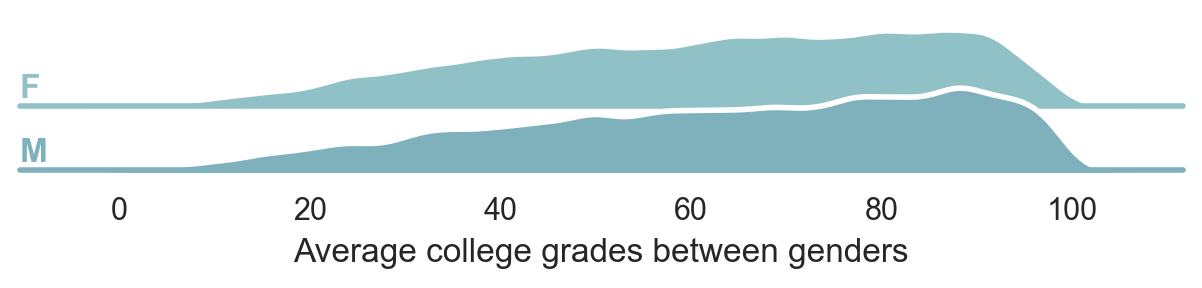

In [20]:
Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')

# Ridgeline_dists(df,x=df.TOTAL_SCORE_S11)

In [21]:
max(df.HI_GRADE_AVG)

100.0

# Histograms

Text(0.5, 0, 'nn')

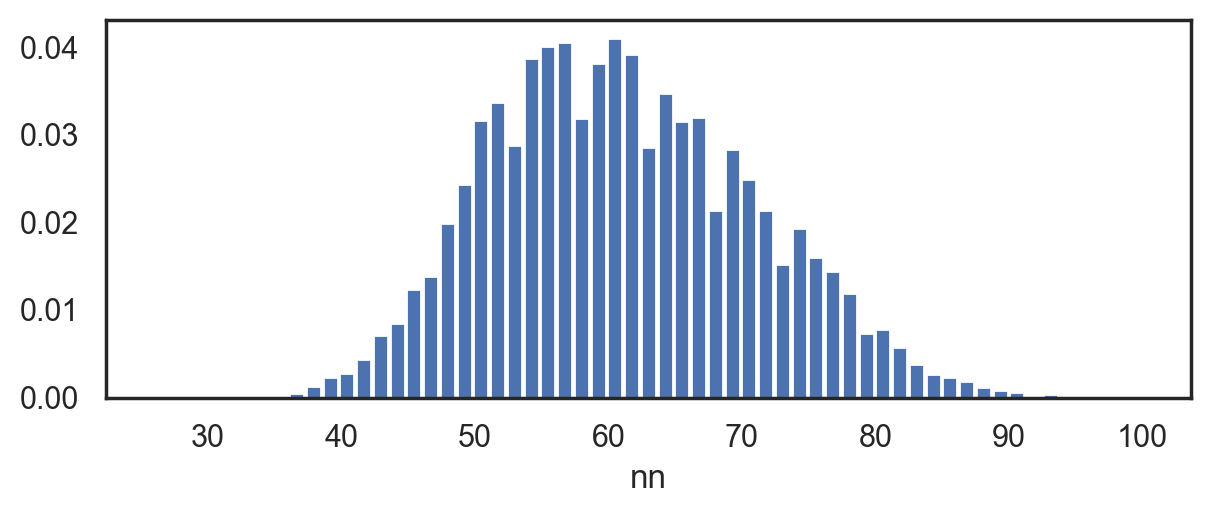

In [22]:
bins = np.linspace(min(df.HI_GRADE_AVG),max(df.HI_GRADE_AVG), 60)
hist, edges = np.histogram(df.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.set_xlabel('nn')
# Det er måske en idé at lave to forskellige regressionslinjer her. En for kvinderne og en for mændene. 

Text(0, 0.5, 'Probability density')

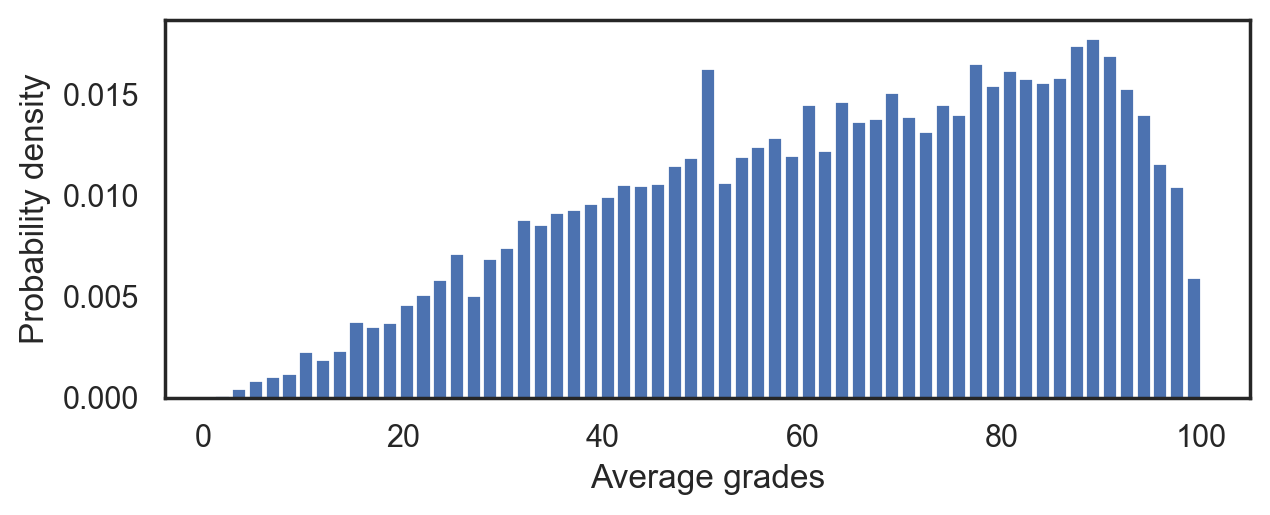

In [23]:
bins = np.linspace(min(df.COL_GRADE_AVG),max(df.COL_GRADE_AVG), 60)
hist, edges = np.histogram(df.COL_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]

fig,ax = plt.subplots()
ax.bar(x,hist,width=width*0.9)
ax.set_xlabel('Average grades')
ax.set_ylabel('Probability density')

In [24]:
from numpy import array
# men_means = men_means['HI_GRADE_AVG'].to_list()



men_means['HI_GRADE_AVG'].to_list()
women_means = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
women_means['HI_GRADE_AVG'].to_list()

men_means = np.array(men_means['HI_GRADE_AVG'].T.to_list())
men_means


NameError: name 'men_means' is not defined

Text(0.5, 0, 'men')

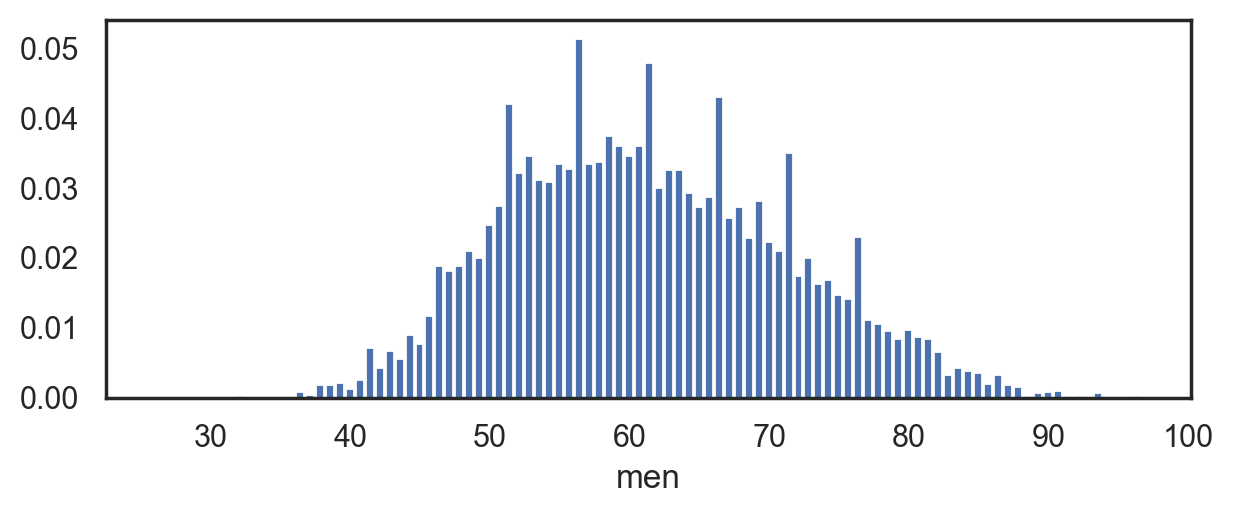

In [25]:
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(men.HI_GRADE_AVG),max(men.HI_GRADE_AVG), 100)

histmen, edges = np.histogram(men.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histmen,width=width*0.9)
ax.set_xlabel('men')


Text(0.5, 0, 'women')

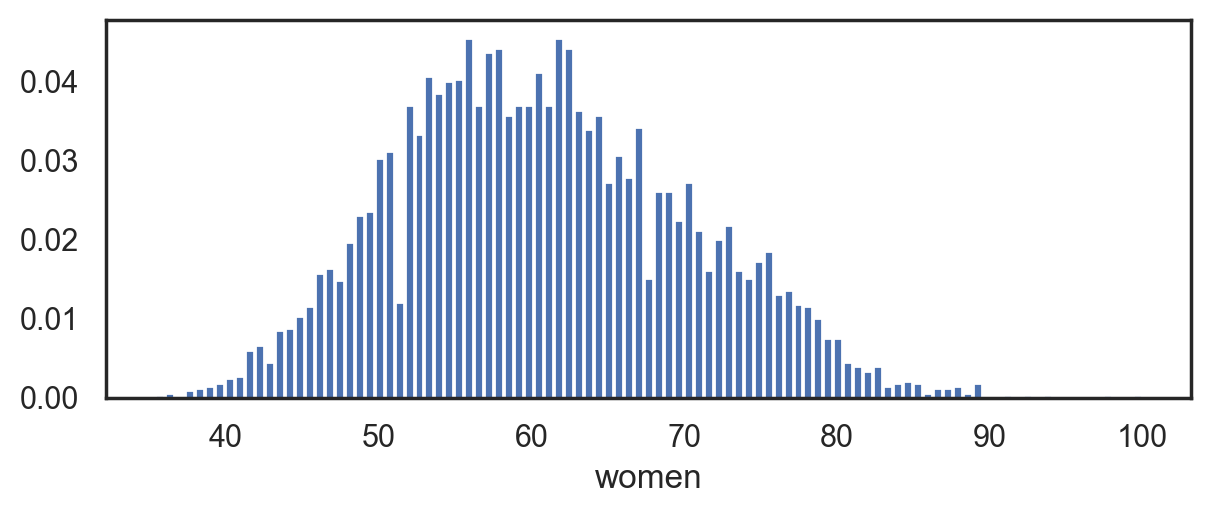

In [26]:
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
bins = np.linspace(min(women.HI_GRADE_AVG),max(women.HI_GRADE_AVG), 100)

histwomen, edges = np.histogram(women.HI_GRADE_AVG, bins=bins, density=True)
x = (edges[1:]+edges[:-1])/2
width=bins[1]-bins[0]
fig,ax = plt.subplots()
ax.bar(x,histwomen,width=width*0.9)
ax.set_xlabel('women')

In [27]:
women

,GENDER,HI_GRADE_AVG
0,F,74.666667
1,F,76.333333
3,F,59.666667
5,F,66.333333
7,F,74.666667
...,...,...
12401,F,71.000000
12402,F,62.333333
12403,F,63.000000
12404,F,79.666667


In [35]:


y1=np.array(women.HI_GRADE_AVG)
y2=np.array(men.HI_GRADE_AVG)

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
# mn, mx = plt.xlim()
plt.xlim( min(women.HI_GRADE_AVG),max(women.HI_GRADE_AVG))

# add our distributions to figure
x = bins
plt.plot(x, histwomen, color='C0', ls='--', label='d1')
plt.plot(x, histmen, color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()




AttributeError: 'rv_frozen' object has no attribute 'HI_GRADE_AVG'

In [34]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

# parameterise our distributions
# d1 = sps.norm(0, 10)
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d2 = sps.norm(men.HI_GRADE_AVG.mean(),men.HI_GRADE_AVG.std())

# sample values from above distributions
y1 = d1.rvs(300)
y2 = d2.rvs(300)
# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='d1')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

AttributeError: 'rv_frozen' object has no attribute 'HI_GRADE_AVG'

In [31]:
d1 = sps.norm(women.HI_GRADE_AVG.mean(),women.HI_GRADE_AVG.std())
d1

AttributeError: 'rv_frozen' object has no attribute 'HI_GRADE_AVG'

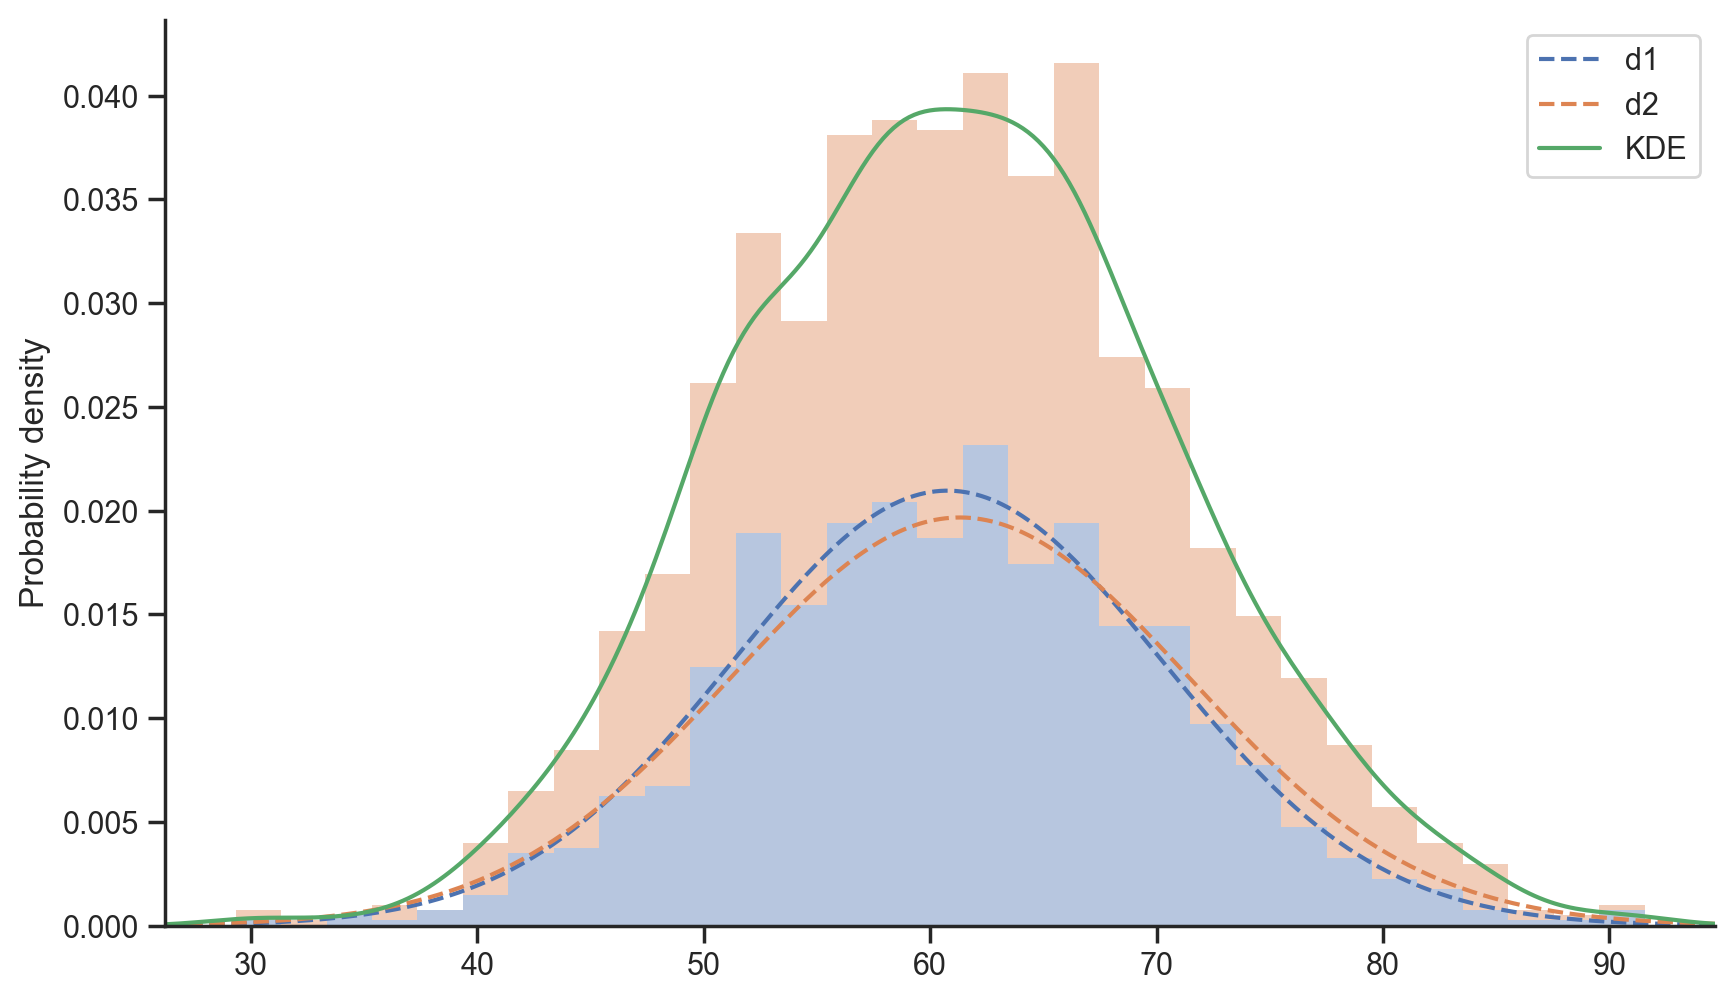

In [33]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style='ticks')

# parameterise our distributions
men = sps.norm(0, 10)
women = sps.norm(60, 15)

# sample values from above distributions
y1 = d1.rvs(1000)
y2 = d2.rvs(1000)
# combine mixture
ys = np.concatenate([y1, y2])

# create new figure with size given explicitly
plt.figure(figsize=(10, 6))

# add histogram showing individual components
plt.hist([y1, y2], 31, histtype='barstacked', density=True, alpha=0.4, edgecolor='none')

# get X limits and fix them
mn, mx = plt.xlim()
plt.xlim(mn, mx)

# add our distributions to figure
x = np.linspace(mn, mx, 301)
plt.plot(x, d1.pdf(x) * (len(y1) / len(ys)), color='C0', ls='--', label='d1')
plt.plot(x, d2.pdf(x) * (len(y2) / len(ys)), color='C1', ls='--', label='d2')

# estimate Kernel Density and plot
kde = sps.gaussian_kde(ys)
plt.plot(x, kde.pdf(x), label='KDE')

# finish up
plt.legend()
plt.ylabel('Probability density')
sns.despine()

In [ ]:
men_means.

AttributeError: 'DataFrame' object has no attribute 'M'